In [313]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [314]:
data =pd.read_excel("C:\\Users\\HP\\Downloads\\1553768847_housing.xlsx")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [316]:
data.dropna(inplace = True)

In [317]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   ocean_proximity     20433 non-null  object 
 9   median_house_value  20433 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


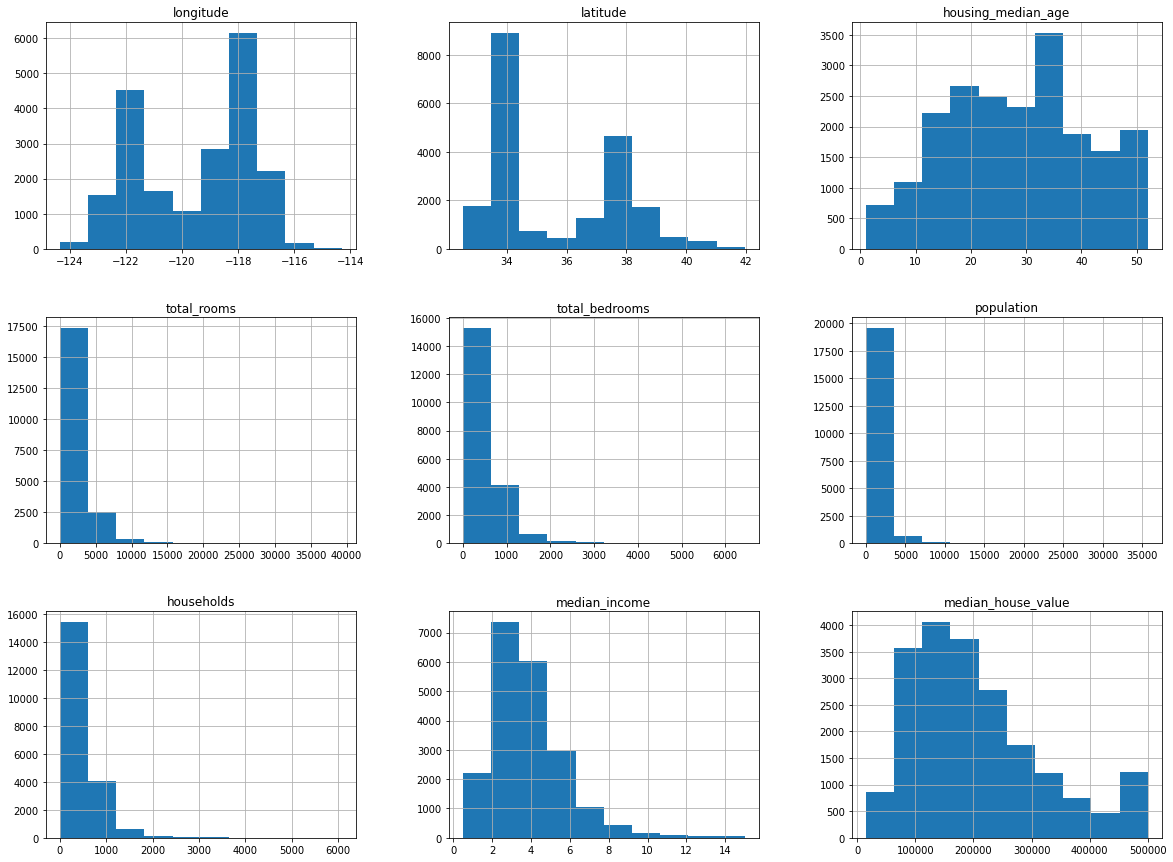

In [318]:
data.hist(figsize=(20,15));

In [319]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


<AxesSubplot: >

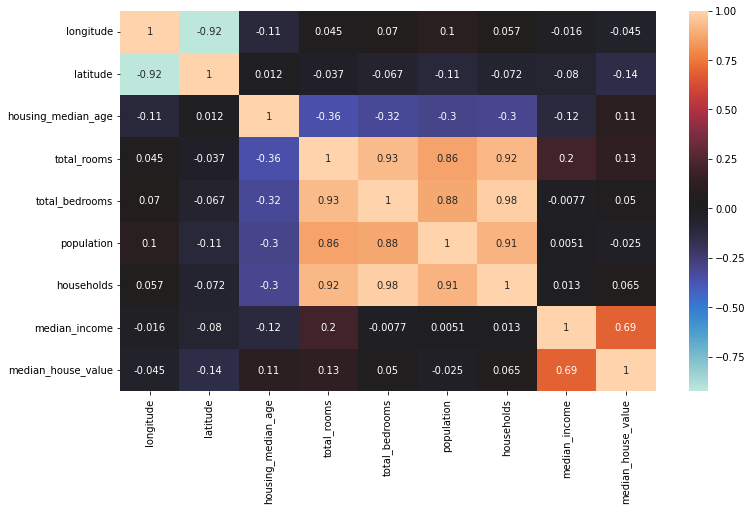

In [320]:
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(), annot= True, cmap='icefire')

In [321]:
data['total_rooms']= np.log(data['total_rooms'] +1)
data['total_bedrooms']= np.log(data['total_bedrooms'] +1)
data['population']= np.log(data['population'] +1)
data['households']= np.log(data['households'] +1)

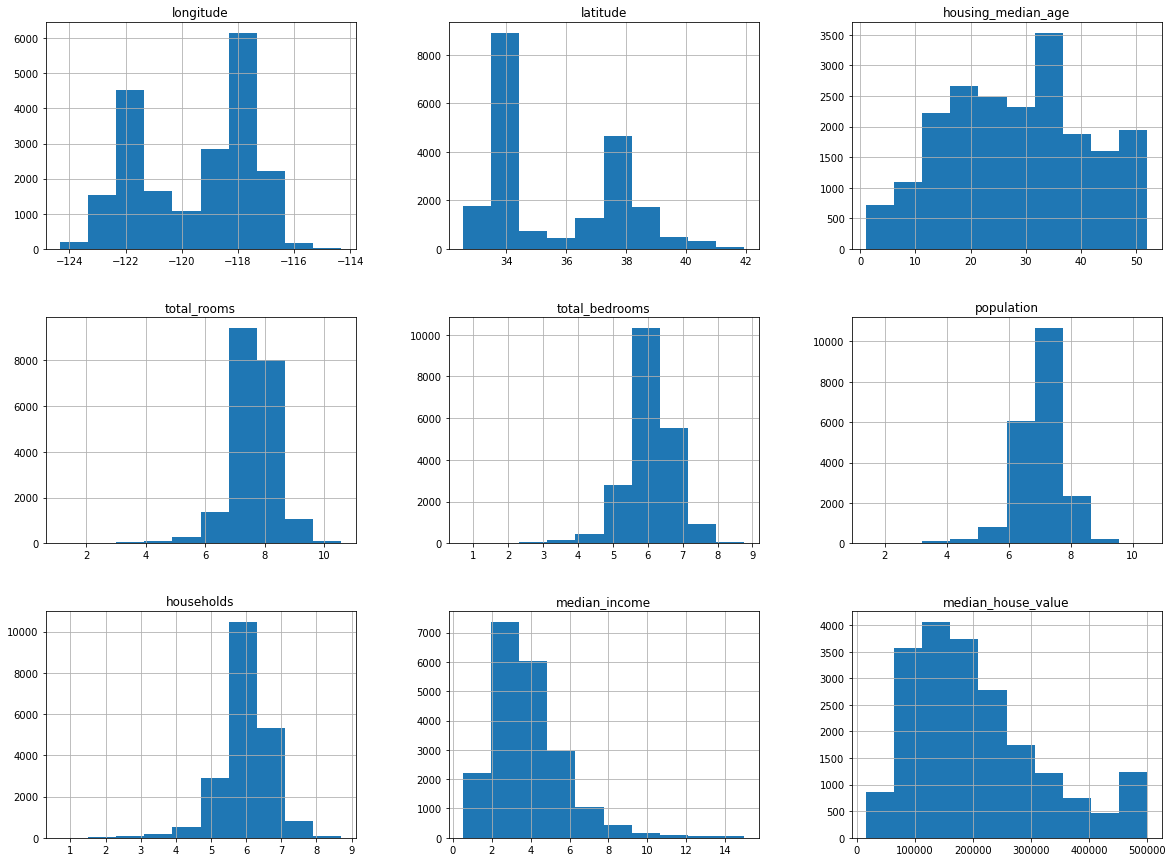

In [322]:
data.hist(figsize= (20,15));

In [323]:
data.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot: title={'center': 'Scatter plot: Longitute Vs Latitude'}, xlabel='latitude', ylabel='longitude'>

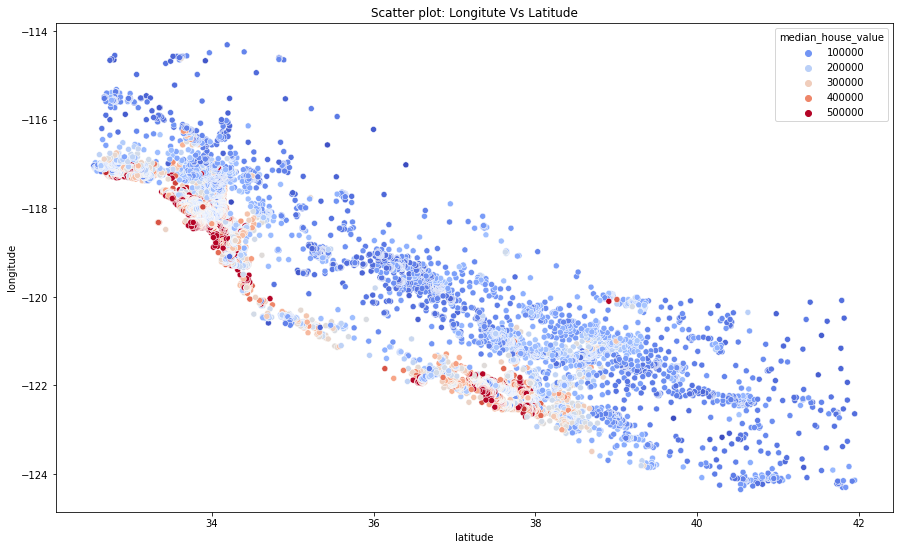

In [324]:
plt.figure(figsize=(15,9))
plt.title('Scatter plot: Longitute Vs Latitude')
sns.scatterplot(x ='latitude', y= 'longitude', data=data, hue='median_house_value', palette='coolwarm')


<b>Observation</b>
 - Here red dot in above scatterplot show houses which are expensive and near to the ocean area. 
  

In [325]:
data['bedroom_ratio']=data['total_bedrooms']/data['total_rooms']
data['household_ratio']= data['total_rooms']/data['households']

<AxesSubplot: >

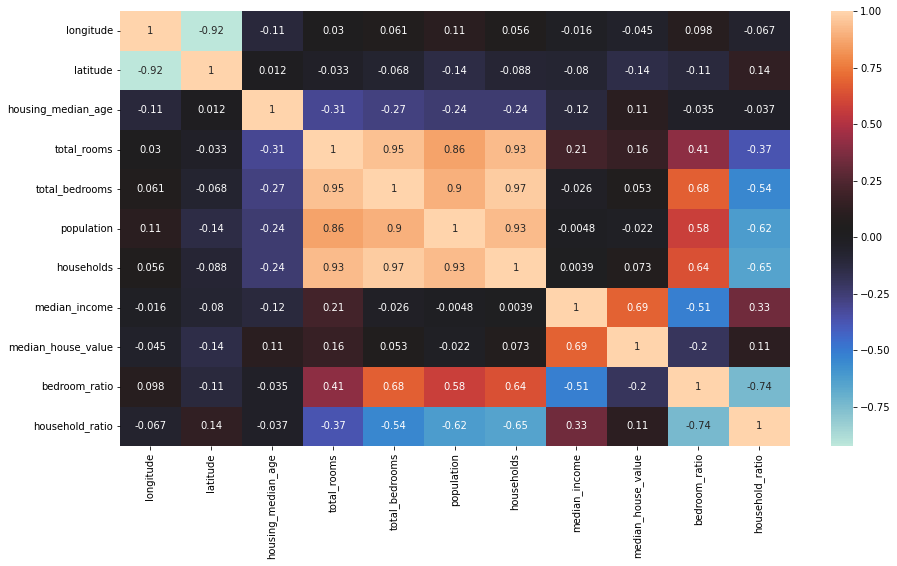

In [326]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True,cmap='icefire')

In [365]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X= data.drop(['median_house_value'],axis=1)
y=data['median_house_value']


X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)




In [366]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_name' is the name of the categorical column
# used to change categorical column into numerical column
encoder = LabelEncoder()
data['ocean_proximity'] = encoder.fit_transform(data['ocean_proximity'])

In [367]:
#Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [362]:
linear_model =LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

In [368]:
linear_model.score(X_test,y_test)

0.6782391750967954

In [364]:
Y_pred_linear = linear_model.predict(X_test)
linear_rmse = mean_squared_error(y_test, Y_pred_linear, squared=False)
print("Linear Regression RMSE:", linear_rmse)

Linear Regression RMSE: 67754.39332740767


In [292]:
# Linear Regression with one independent variable (median_income)
X_train = X_train_scaled[:, 6].reshape(-1, 1)
X_test = X_test_scaled[:, 6].reshape(-1, 1)

In [308]:
linear_regression_income = LinearRegression()
linear_regression_income.fit(X_train_income, y_train)
Y_pred_linear_income = linear_regression_income.predict(X_test_income)

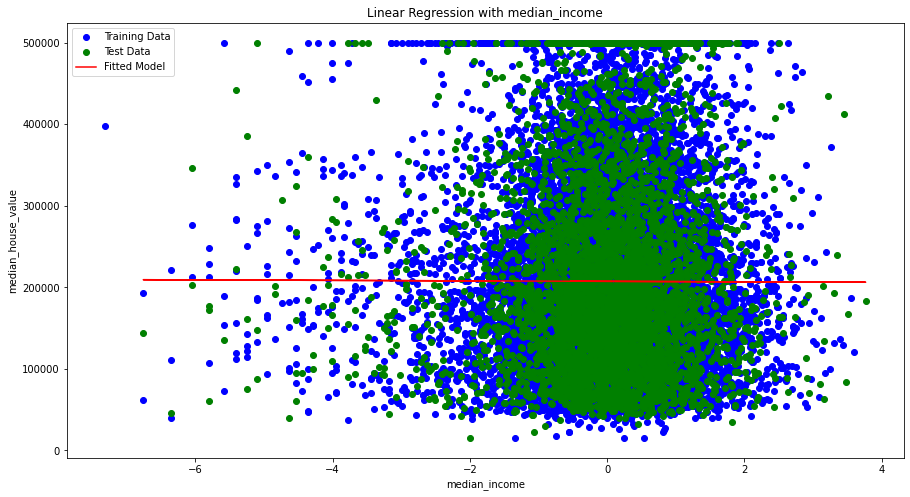

In [311]:
plt.figure(figsize=(15,8))
plt.scatter(X_train_income, y_train, color="blue", label="Training Data")
plt.scatter(X_test_income, y_test, color="green", label="Test Data")
plt.plot(X_test_income, Y_pred_linear_income, color="red", label="Fitted Model")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("Linear Regression with median_income")
plt.legend()
plt.show()